In [1]:
import utils as u 

2024-02-26 17:09:30.081262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train, y_train, x_test, y_test = u.load_data(random_seed=2) 

[0 3 0 0 2 0 2 1 3 0 0 1 2 0 3 1 0 2 0 2 1 3 3 1 2 1 0 1 1 2 0 1 0 3 1 0 0
 2 1 2 1 3 3 3 0 2 2 0 0 2 0 2 3 1 0 1 1 1 2 2 3 3 2 1 0 0 0 2 0 1 0 3 2 1
 1 1 2 1 1 3 2 1 1 0 1 3 0 3 2 3 2 0 0 1 2 3 0 3 2 1 1 3 3 3 2 3 2 0 0 3 2
 3 0 3 3 2 2 2 2 1 3 1 3 2 0 2 1 2 3 2 1 2 3 1 2 3 2 1 2 3 2 3 2 0 1 0 0 0
 1 3 3 2 2 2 0 0 3 2 2 1 0 0 3 2 3 1 2 1 1 0 1 3 0 1 0 0 1 1 2 0 0 0 2 1 2
 0 0 3 1 1 1 1 2 1 1 2 2 2 3 2 2 2 0 0 3 1 0 3 0 1 2 3 1 3 3 2 0 2 1 0 0 3
 0 0 0 1 0 1 2 0 1 2 2 0 1 1 2 3 0 0 0 3 3 1 2 2 0 1 1 3 0 0 1 3 0 2]


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(204, 63) (204,) (52, 63) (52,)


In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(184, 63) (184,) (52, 63) (52,)


In [6]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
0.99888474
-0.31559476
2
0.94580257
-0.23086067


In [7]:
model = u.build_model()


In [8]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=20, batch_size=32)

Epoch 1/20
6/6 [==============================] - 1s 39ms/step - loss: 1.4263 - accuracy: 0.1848 - val_loss: 1.3534 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 1.3410 - accuracy: 0.3533 - val_loss: 1.3018 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 1.3004 - accuracy: 0.4402 - val_loss: 1.2640 - val_accuracy: 0.6000
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 1.2690 - accuracy: 0.4837 - val_loss: 1.2345 - val_accuracy: 0.5500
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 1.2407 - accuracy: 0.5598 - val_loss: 1.2034 - val_accuracy: 0.6000
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 1.2134 - accuracy: 0.5652 - val_loss: 1.1794 - val_accuracy: 0.6000
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 1.1885 - accuracy: 0.5489 - val_loss: 1.1464 - val_accuracy: 0.6500
Epoch 8/20
6/6 [=================

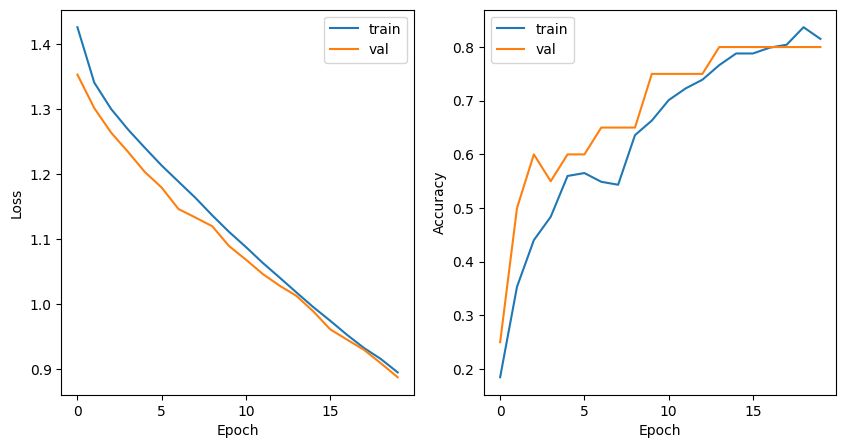

In [9]:
u.plot_loss(history)

In [10]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 4ms/step - loss: 0.8492 - accuracy: 0.8462
0 1 0 3 0
[0 1 0 3 0 2 2 0 1 3 3 2 0 2 1 0 0 0 0 0 0 1 0 1 2 0 1 2 2 2 1 1 2 3 0 0 0
 3 3 1 2 2 0 1 2 3 0 0 2 0 0 2]


In [11]:
model.save('./Handpose-Recognition')

INFO:tensorflow:Assets written to: ./Handpose-Recognition/assets


INFO:tensorflow:Assets written to: ./Handpose-Recognition/assets


In [12]:
# %pip install tensorflowjs

In [13]:
# !tensorflowjs_converter \
#     --input_format=tf_saved_model \
#     --output_format=tfjs_graph_model \
#     --saved_model_tags=serve \
#     /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week4-Real-Time-Posture-Recognition/Handpose-Recognition\
#     /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week4-Real-Time-Posture-Recognition/tfjsmodel
